In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
diabetes = pd.read_csv("diabetes_data 2.csv", sep = ";")

In [3]:
diabetes.head()

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,Male,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,Male,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,Male,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,Male,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [4]:
diabetes.shape

(520, 17)

There are 520 rows in the dataset, with 16 columns that can be used as predictors. Since gender is categorical, it will be converted to binary of Male = 1 and Female = 0. Class column is the predictor column.

In [5]:
diabetes.dtypes

age                    int64
gender                object
polyuria               int64
polydipsia             int64
sudden_weight_loss     int64
weakness               int64
polyphagia             int64
genital_thrush         int64
visual_blurring        int64
itching                int64
irritability           int64
delayed_healing        int64
partial_paresis        int64
muscle_stiffness       int64
alopecia               int64
obesity                int64
class                  int64
dtype: object

In [6]:
from sklearn.preprocessing import LabelEncoder
gender_encoder = LabelEncoder()

In [7]:
diabetes['gender'] = gender_encoder.fit_transform(diabetes['gender'])

In [8]:
diabetes['gender'].head()

0    1
1    1
2    1
3    1
4    1
Name: gender, dtype: int64

## EDA 

In [24]:
sns.set_style('whitegrid')

Text(0.5, 1.0, 'Distribution of Age')

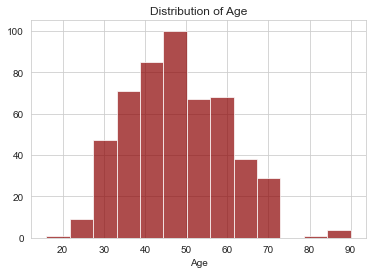

In [130]:
diabetes['age'].hist(bins = 13, color = 'darkred', alpha = 0.7)
plt.xlabel('Age')
plt.title('Distribution of Age')

Text(0.5, 1.0, 'Gender Split')

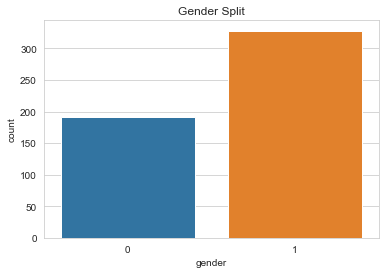

In [54]:
#For this graph, the blue is female, the orange is male
sns.countplot(x = 'gender', data = diabetes)
plt.title('Gender Split')

<AxesSubplot:xlabel='gender', ylabel='count'>

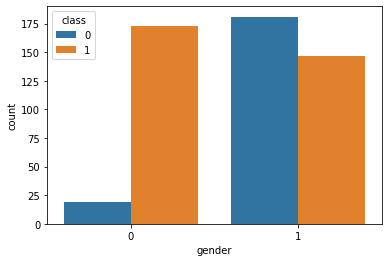

In [10]:
sns.countplot(x = 'gender', hue = 'class', data = diabetes)

<AxesSubplot:>

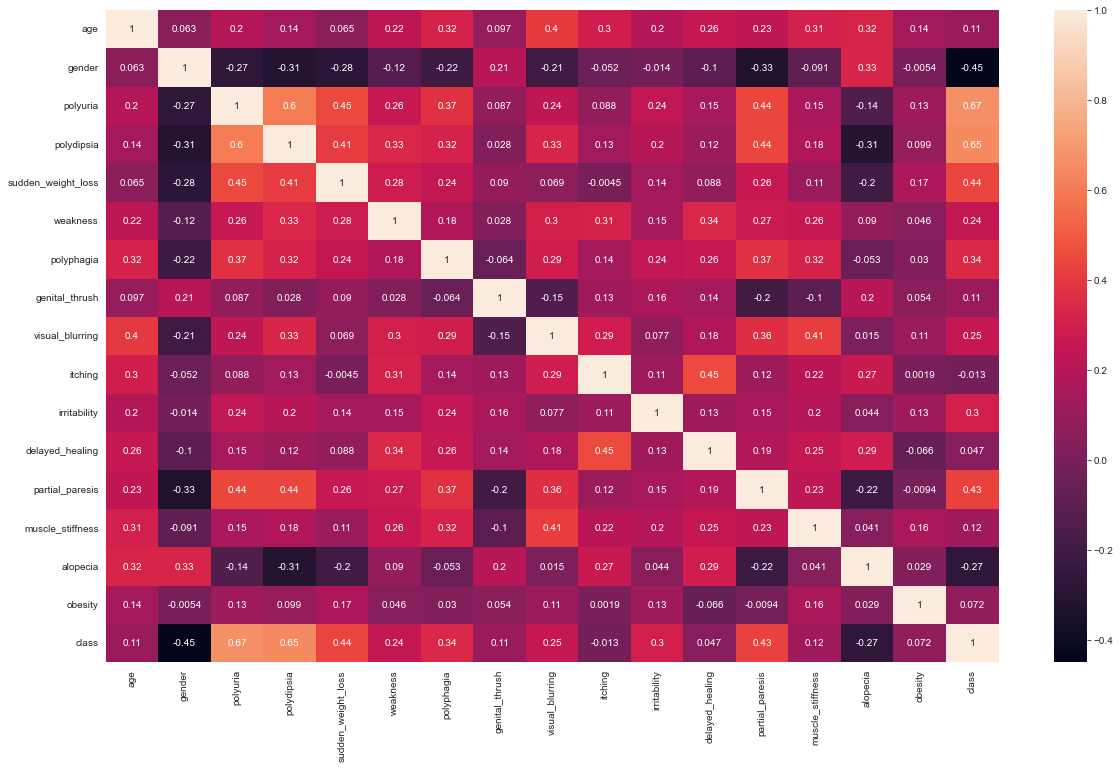

In [44]:
plt.figure(figsize = (20, 12))
sns.heatmap(diabetes.corr(), annot = True)

In [48]:
diabetes.corr()['class'].sort_values()

gender               -0.449233
alopecia             -0.267512
itching              -0.013384
delayed_healing       0.046980
obesity               0.072173
age                   0.108679
genital_thrush        0.110288
muscle_stiffness      0.122474
weakness              0.243275
visual_blurring       0.251300
irritability          0.299467
polyphagia            0.342504
partial_paresis       0.432288
sudden_weight_loss    0.436568
polydipsia            0.648734
polyuria              0.665922
class                 1.000000
Name: class, dtype: float64

### Prediction Models

In [11]:
from sklearn.model_selection import train_test_split

In [17]:
x = diabetes.drop('class',axis=1)
y = diabetes['class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 101)

#### Logistic Regression

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()

In [22]:
lr.fit(X_train,y_train)

LogisticRegression()

In [23]:
pred = lr.predict(X_test)

In [87]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, f1_score

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        60
           1       0.97      0.90      0.93        96

    accuracy                           0.92       156
   macro avg       0.91      0.92      0.91       156
weighted avg       0.92      0.92      0.92       156



In [57]:
print(confusion_matrix(y_test,pred))

[[57  3]
 [10 86]]


In [128]:
acc_lr = accuracy_score(y_test,pred)
acc_lr

0.9166666666666666

In [89]:
f1_lr = f1_score(y_test,pred)
print(f1_lr)

0.9297297297297298


#### K Nearest Neighbor

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [74]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [75]:
pred_knn = knn.predict(X_test)

In [76]:
print(classification_report(y_test,pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        60
           1       0.92      0.95      0.93        96

    accuracy                           0.92       156
   macro avg       0.92      0.91      0.91       156
weighted avg       0.92      0.92      0.92       156



In [77]:
print(confusion_matrix(y_test,pred_knn))

[[52  8]
 [ 5 91]]


In [127]:
acc_knn = accuracy_score(y_test,pred_knn)
acc_knn

0.9166666666666666

In [91]:
f1_knn = f1_score(y_test,pred_knn)
f1_knn

0.9333333333333333

In [78]:
#used to determine the error rates accros k values from 1 to 40
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

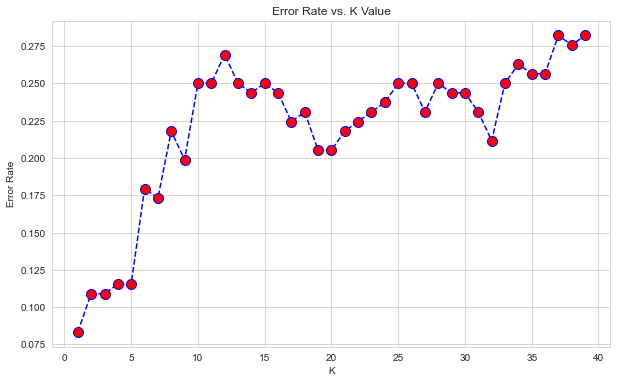

In [79]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle = 'dashed',
         marker = 'o', markerfacecolor = 'red', markersize = 10)
plt.title("Error Rate vs. K Value")
plt.xlabel('K')
plt.ylabel('Error Rate')

#### KNN with tuning

In [80]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)
predict_knn = knn.predict(X_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,predict_knn))
print('\n')
print(classification_report(y_test,predict_knn))

WITH K=5


[[54  6]
 [12 84]]


              precision    recall  f1-score   support

           0       0.82      0.90      0.86        60
           1       0.93      0.88      0.90        96

    accuracy                           0.88       156
   macro avg       0.88      0.89      0.88       156
weighted avg       0.89      0.88      0.89       156



In [126]:
acc_knn_tuned = accuracy_score(y_test,predict_knn)
acc_knn_tuned

0.8846153846153846

In [86]:
confusion_matrix(y_test,predict_knn)

array([[54,  6],
       [12, 84]])

In [92]:
f1_knn_tuned = f1_score(y_test,predict_knn)
f1_knn_tuned

0.9032258064516129

#### Decision tree

In [93]:
from sklearn.tree import DecisionTreeClassifier

In [94]:
dtree = DecisionTreeClassifier()

In [95]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [96]:
pred_dtree = dtree.predict(X_test)

In [98]:
print(classification_report(y_test,pred_dtree))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        60
           1       0.98      0.98      0.98        96

    accuracy                           0.97       156
   macro avg       0.97      0.97      0.97       156
weighted avg       0.97      0.97      0.97       156



In [100]:
print(confusion_matrix(y_test,pred_dtree))

[[58  2]
 [ 2 94]]


In [124]:
acc_dtree = accuracy_score(y_test,pred_dtree)
acc_dtree

0.9743589743589743

In [102]:
f1_dtree = f1_score(y_test,pred_dtree)
f1_dtree

0.9791666666666666

In [107]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [111]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(diabetes.columns[:-1])
features

['age',
 'gender',
 'polyuria',
 'polydipsia',
 'sudden_weight_loss',
 'weakness',
 'polyphagia',
 'genital_thrush',
 'visual_blurring',
 'itching',
 'irritability',
 'delayed_healing',
 'partial_paresis',
 'muscle_stiffness',
 'alopecia',
 'obesity']

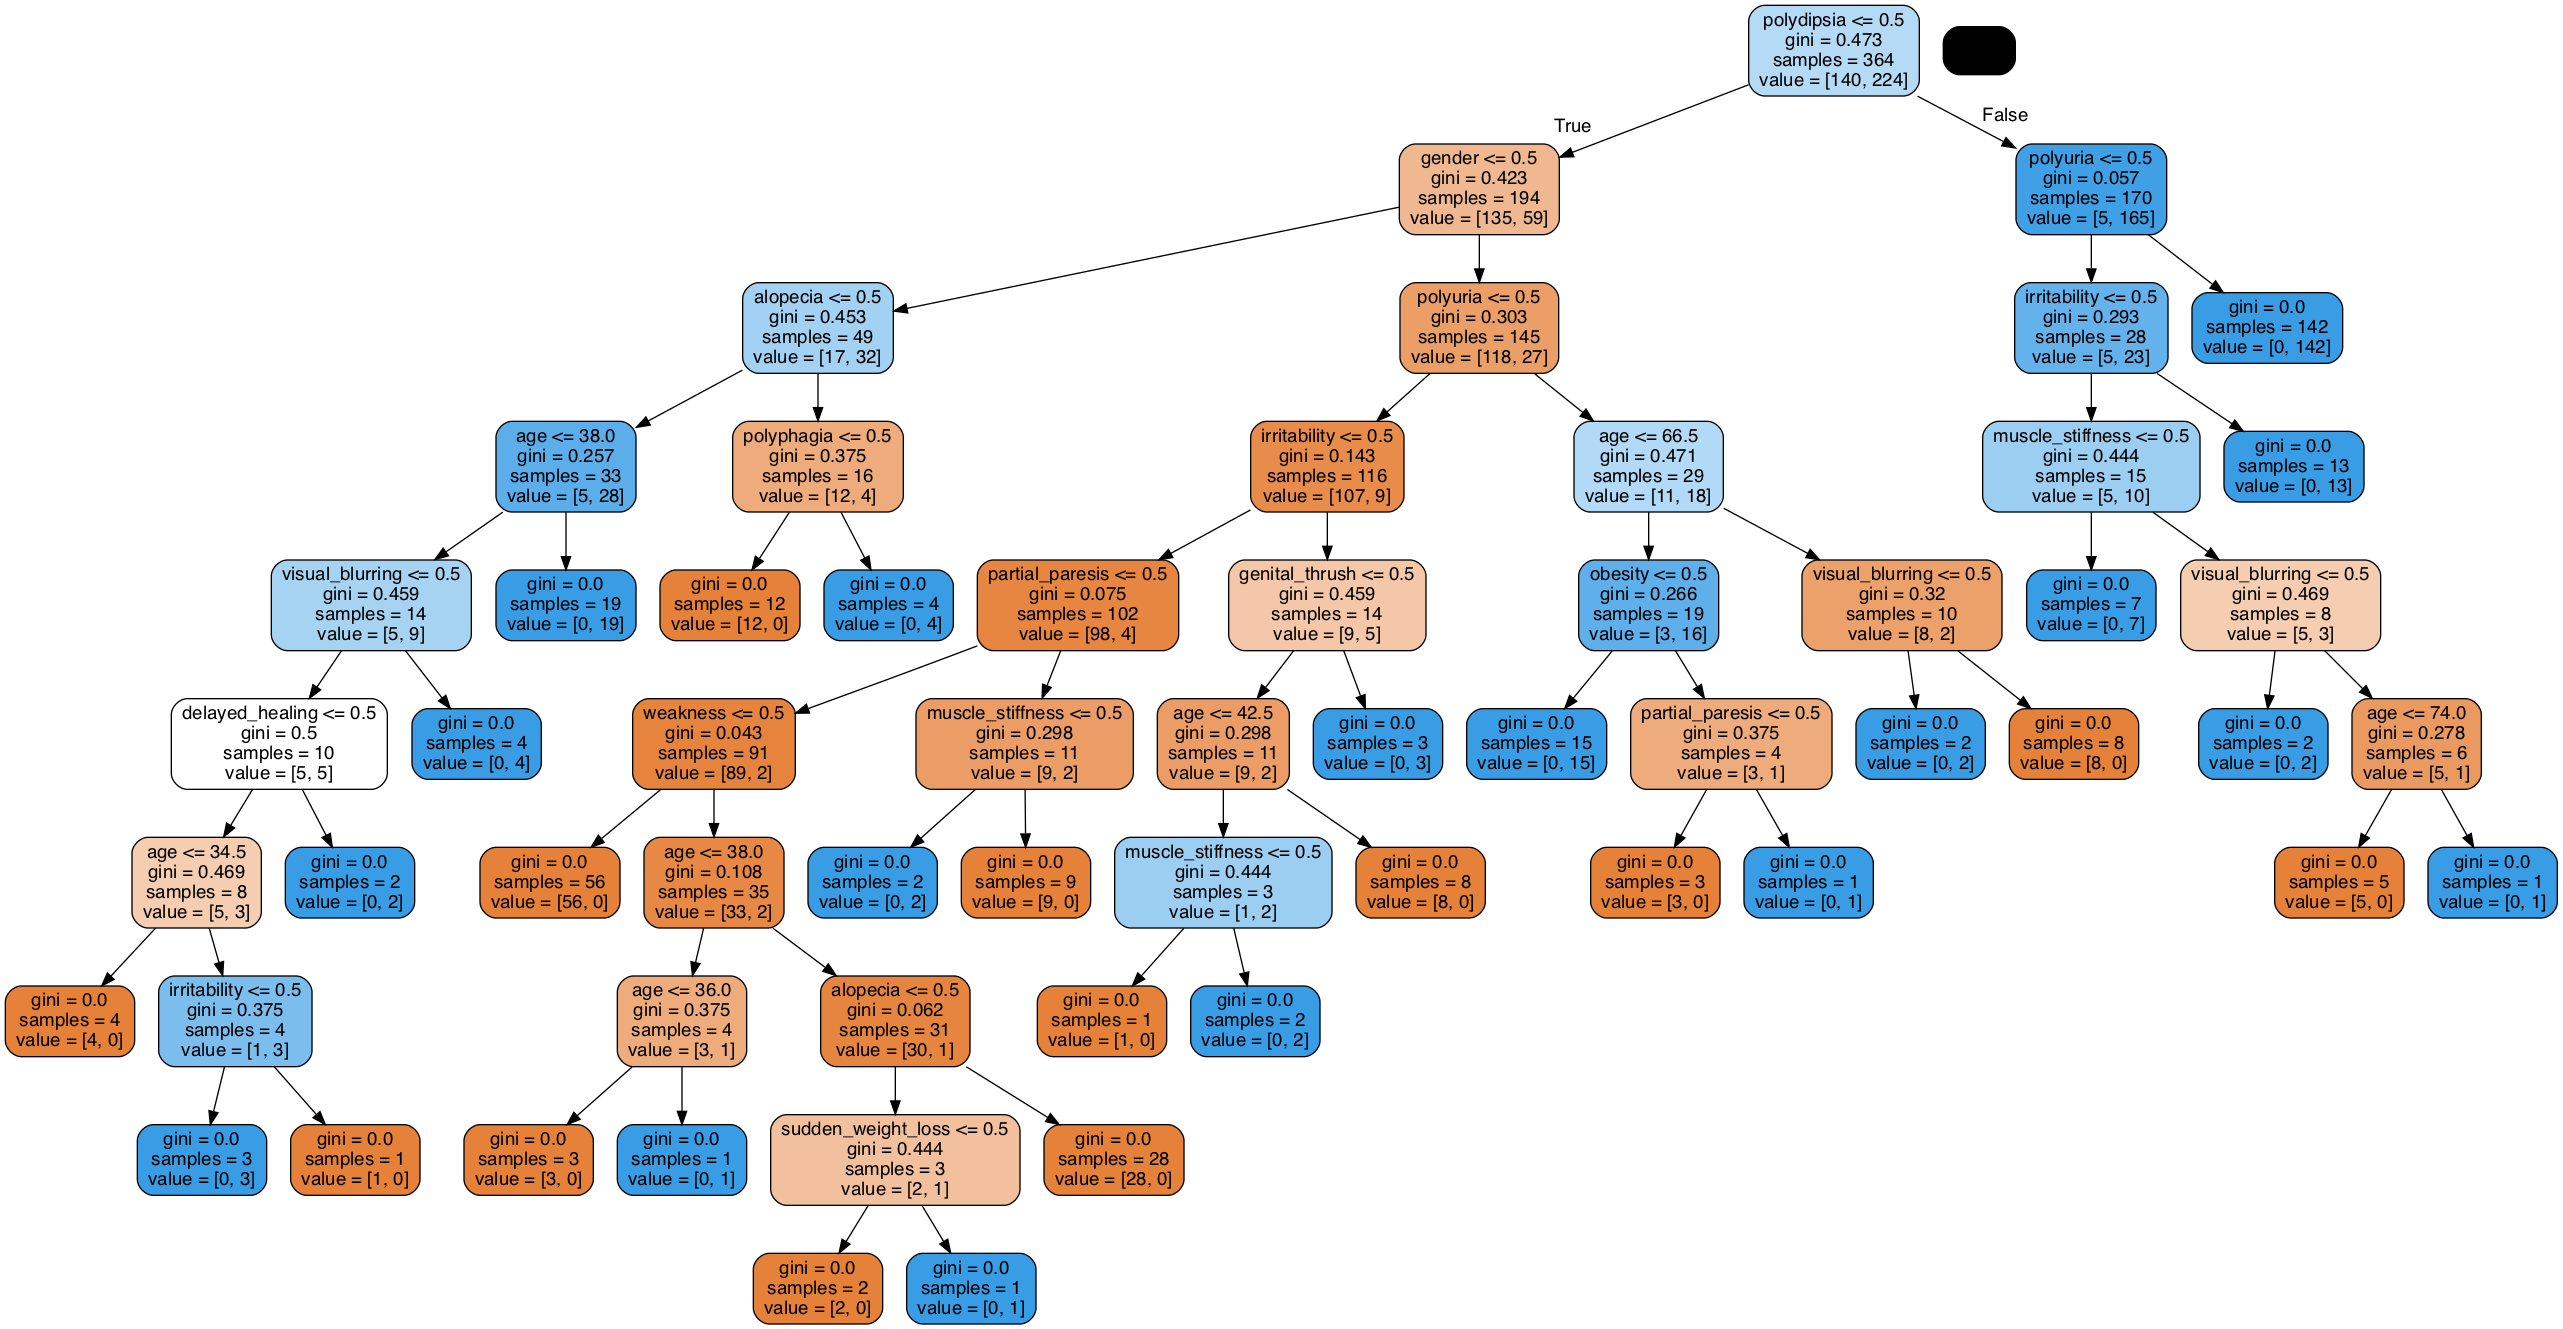

In [112]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png()) 

#### Random Forest 

In [113]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
rfc = RandomForestClassifier(n_estimators = 100)

In [115]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [116]:
rfc_pred = rfc.predict(X_test)

In [117]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        60
           1       0.99      0.99      0.99        96

    accuracy                           0.99       156
   macro avg       0.99      0.99      0.99       156
weighted avg       0.99      0.99      0.99       156



In [118]:
print(confusion_matrix(y_test,rfc_pred))

[[59  1]
 [ 1 95]]


In [125]:
acc_rfc = accuracy_score(y_test,rfc_pred)
acc_rfc

0.9871794871794872

In [120]:
f1_rfc = f1_score(y_test,rfc_pred)
f1_rfc

0.9895833333333334

In [129]:
f1score = {'Model':['Logistic Regression','KNN', 'KNN w/ Tuning','Decision Tree','Random Forest'],
          'f1 Score':[f1_lr,f1_knn,f1_knn_tuned,f1_dtree,f1_rfc],
           'accuracy score':[acc_lr,acc_knn,acc_knn_tuned,acc_dtree,acc_rfc]}
df = pd.DataFrame(f1score)
df.sort_values(by = 'f1 Score',ascending = True)

,Model,f1 Score,accuracy score
2,KNN w/ Tuning,0.903226,0.884615
0,Logistic Regression,0.929730,0.916667
1,KNN,0.933333,0.916667
3,Decision Tree,0.979167,0.974359
4,Random Forest,0.989583,0.987179
